### Import Dataset

In [1]:
import pandas as pd
import numpy as np 

In [2]:
test_pd = pd.read_csv("../datasets/fashion/fashion-mnist_test.csv")
train_pd = pd.read_csv("../datasets/fashion/fashion-mnist_train.csv")

### Pre Process Data

In [3]:
from tensorflow.keras.utils import to_categorical

test_label = test_pd["label"].to_numpy()
test = test_pd.drop(columns="label").to_numpy()
train_label = train_pd["label"].to_numpy()
train = train_pd.drop(columns="label").to_numpy()

train = train / 255
test = test / 255
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

train = train.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)

print(train.shape, train_label.shape, train_label[0])

2025-01-16 13:10:54.063080: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737020454.079120   68536 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737020454.084219   68536 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-16 13:10:54.104869: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(60000, 28, 28, 1) (60000, 10) [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


### Define Model

In [4]:
import keras

model = keras.Sequential([])
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=[1,1], padding="valid", input_shape=(28,28,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=[2,2]))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128, activation="relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=64, activation="relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=10, activation="softmax"))

model.compile(optimizer="adam", loss=keras.losses.CategoricalCrossentropy(), metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-16 13:10:59.921471: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 701,706 (2.68 MB)

 Trainable params: 701,642 (2.68 MB)

 Non-trainable params: 64 (256.00 B)

In [5]:
callback  = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True) 
history = model.fit(train, train_label, batch_size=128, epochs=10, validation_data=(test, test_label), callbacks=[callback])

Epoch 1/10


2025-01-16 13:11:00.559336: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 79ms/step - accuracy: 0.7218 - loss: 0.7998 - val_accuracy: 0.8722 - val_loss: 0.4210
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 81ms/step - accuracy: 0.8711 - loss: 0.3676 - val_accuracy: 0.8999 - val_loss: 0.2837
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 80ms/step - accuracy: 0.8884 - loss: 0.3154 - val_accuracy: 0.9022 - val_loss: 0.2751
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.8977 - loss: 0.2902 - val_accuracy: 0.9036 - val_loss: 0.2667
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 78ms/step - accuracy: 0.9074 - loss: 0.2598 - val_accuracy: 0.9074 - val_loss: 0.2574
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - accuracy: 0.9106 - loss: 0.2472 - val_accuracy: 0.9153 - val_loss: 0.2406
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 91ms/step - accuracy: 0.9143 - loss: 0.2263 - val_accuracy: 0.9138 - val_loss: 0.2355
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 81ms/step - accuracy: 0.9198 - loss: 0.2152 - val_accurac

In [6]:
model.evaluate(test, test_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9143 - loss: 0.2319


[0.23273251950740814, 0.9175999760627747]

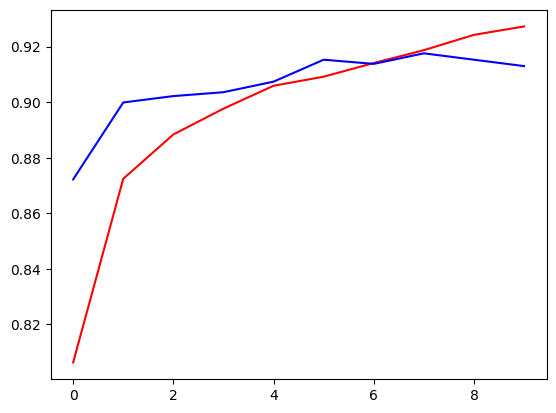

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color="red")
plt.plot(history.history["val_accuracy"],  color="blue")
plt.show()